<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Text%20Mining%20and%20Natural%20Language%20processing/TMNLP_Assignment_1_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMNLP Assignment in R

BACKGROUND:

The given data contain short and crisp movie reviews by various critics.

In [ ]:
install.packages("tm")
install.packages("wordcloud")
install.packages("tidytext")
install.packages("widyr")
install.packages("textdata")
install.packages("dplyr")
install.packages("syuzhet")
library(tm)
library(tidyverse)
library(wordcloud)
library(tidytext)
library(widyr)
library(textdata)
library(dplyr)
library(syuzhet)

In [ ]:
# @title Import Textdata. Do the essential cleaning of the data.

lines <- readLines("/content/Textdata.txt")
data <- data.frame(Review = lines, stringsAsFactors = FALSE)

# Convert Reviews to lowercase.
data$Cleaned_Review <- tolower(data$Review)

# Remove stop words
data$Cleaned_Review <- removeWords(data$Cleaned_Review, stopwords("en"))

# Remove all characters(#$",@, etc.) except alphabets, numbers, and spaces.
data$Cleaned_Review <- gsub("[^[:alnum:][:space:]]", "", data$Cleaned_Review)

# Remove numbers from the text
data$Cleaned_Review <- gsub("[0-9]", "", data$Cleaned_Review)

#Remove any leading or trailing whitespace and Reduce sequence of whitespace to a single space.
data$Cleaned_Review <- str_squish(data$Cleaned_Review)

In [ ]:
head(data)

,Review,Cleaned_Review
,<chr>,<chr>
1,"films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell
2,"for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",starters created alan moore eddie campbell brought medium whole new level mid s part series called watchmen
3,to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .,say moore campbell thoroughly researched subject jack ripper like saying michael jackson starting look little odd
4,"the book ( or "" graphic novel , "" if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .",book graphic novel will pages long includes nearly consist nothing footnotes
5,"in other words , don't dismiss this film because of its source .",words dismiss film source
6,"if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes .",can get past whole comic book thing might find another stumbling block hells directors albert allen hughes


In [ ]:
head(data$Cleaned_Review)

[1] "films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell"
[2] "starters created alan moore eddie campbell brought medium whole new level mid s part series called watchmen"                                                              
[3] "say moore campbell thoroughly researched subject jack ripper like saying michael jackson starting look little odd"                                                        
[4] "book graphic novel will pages long includes nearly consist nothing footnotes"                                                                                             
[5] "words dismiss film source"                                                                                                                                                
[6] "can get past whole comic book thing might find another stumbling block hells directors albert allen hughes"

In [ ]:
# @title Find words with minimum frequency 6

words <- data %>%
  unnest_tokens(word, Cleaned_Review) %>%
  count(word, sort = TRUE)

words_min_6 <- words %>% filter(n >= 6)
print(words_min_6)

   word  n
1  film 10
2  like  7
3  make  7
4  even  6
5 movie  6


In [ ]:
# @title List words with at least 0.35 correlation with ‘film’

word_corr <- data %>%
  mutate(row_num = row_number()) %>% # Create a new column 'row_num'
  unnest_tokens(word, Cleaned_Review) %>%
  pairwise_cor(item = word, feature = row_num, sort = TRUE)

print(word_corr)

# Filter for words with at least 0.35 correlation with 'film'
film_cors <- word_corr %>% filter(item1 == "film" & correlation >= 0.35)

# Display results
print(film_cors)

# A tibble: 298,662 × 3
   item1       item2   correlation
   <chr>       <chr>         <dbl>
 1 books       adapted           1
 2 plenty      adapted           1
 3 success     adapted           1
 4 whether     adapted           1
 5 superheroes adapted           1
 6 batman      adapted           1
 7 superman    adapted           1
 8 spawn       adapted           1
 9 geared      adapted           1
10 toward      adapted           1
# ℹ 298,652 more rows
# A tibble: 2 × 3
  item1 item2   correlation
  <chr> <chr>         <dbl>
1 film  now           0.415
2 film  biggest       0.415


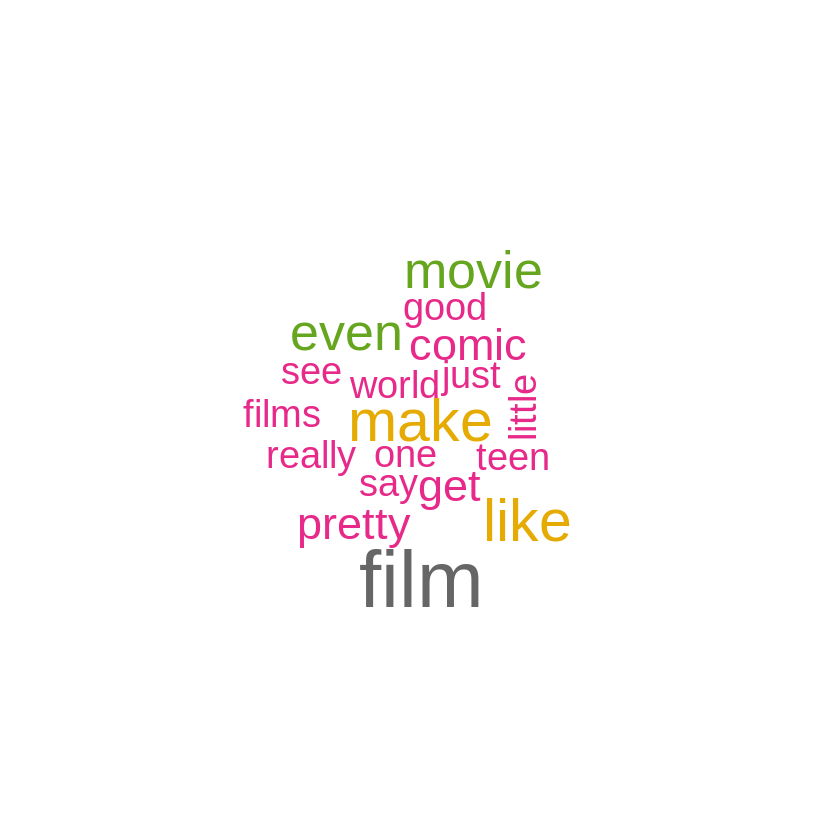

In [ ]:
# @title Create a wordcloud with words having minimum frequency 4. (Use any palette from RColorBrewer)

words_min_4 <- words %>% filter(n >= 4)

wordcloud(words = words_min_4$word,
          freq = words_min_4$n,
          max.words = 100,
          colors = brewer.pal(8, "Dark2"))

In [ ]:
# @title List the number of lines having sentiments ‘Sarcasm’, ‘Very Negative’ and ‘Very Positive’

sentiments <- data %>% mutate(sentiment = get_nrc_sentiment(Cleaned_Review))

Very_Positive <- sentiments$sentiment %>% filter( positive == "1")
Very_Negative <- sentiments$sentiment %>% filter( negative == "1")
Sarcasm       <- sentiments$sentiment %>% filter( joy  == "1")


count_very_positive <- nrow(Very_Positive)
count_very_negative <- nrow(Very_Negative)
count_sarcasm <- nrow(Sarcasm)

# Print the results
cat("Very Positive lines:", count_very_positive, "\n")
cat("Very Negative lines:", count_very_negative, "\n")
cat("Sarcasm lines:", count_sarcasm, "\n")

Very Positive lines: 18 
Very Negative lines: 19 
Sarcasm lines: 12 


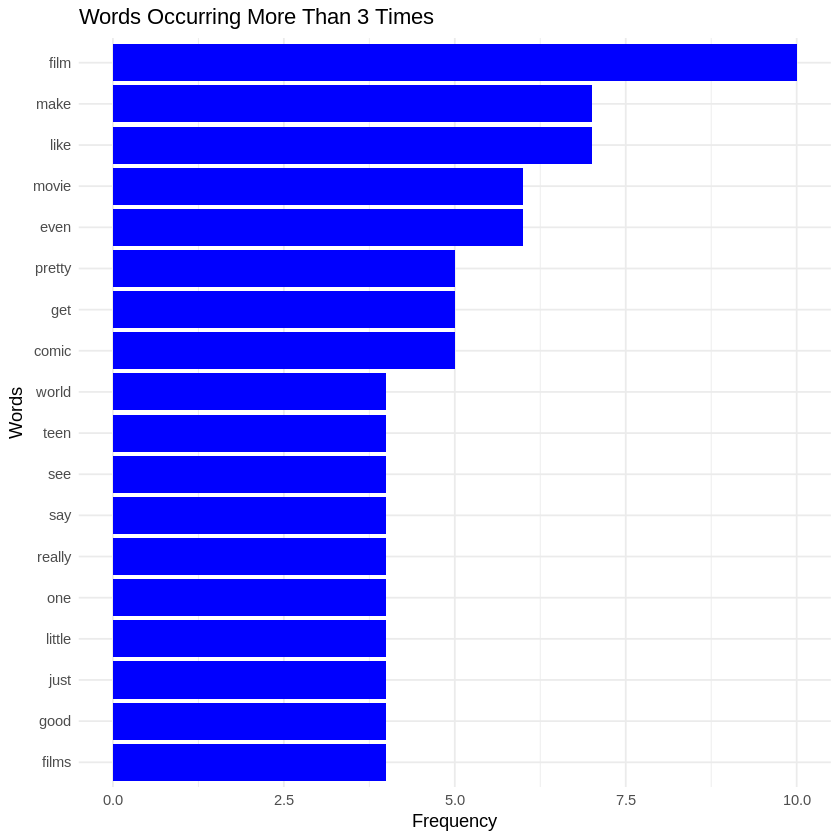

In [ ]:
# @title Plot graph showing words occurring more than 3 times (Use tidytext package)

# Filter words occurring more than 3 times
words_gt_3 <- words %>% filter(n > 3)

# Plot
ggplot(words_gt_3, aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  labs(title = "Words Occurring More Than 3 Times", x = "Words", y = "Frequency") +
  theme_minimal()